In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df_sra=pd.read_csv('sra_complete_runs.csv',low_memory=False)
df_sra.head()

,Run,ReleaseDate,LoadDate,spots,bases,spots_with_mates,avgLength,size_MB,AssemblyName,download_path,...,Affection_Status,Analyte_Type,Histological_Type,Body_Site,CenterName,Submission,dbgap_study_accession,Consent,RunHash,ReadHash
0,ERR3550121,2019-09-25 19:35:40,NaN,0,0,0,0,0,NaN,NaN,...,NaN,NaN,NaN,NaN,UOC-CCG,ERA2143351,NaN,public,NaN,NaN
1,ERR3550142,2019-09-25 19:35:41,NaN,0,0,0,0,0,NaN,NaN,...,NaN,NaN,NaN,NaN,UOC-CCG,ERA2143351,NaN,public,NaN,NaN
2,ERR3550147,2019-09-25 19:35:41,NaN,0,0,0,0,0,NaN,NaN,...,NaN,NaN,NaN,NaN,UOC-CCG,ERA2143351,NaN,public,NaN,NaN
3,ERR3550125,2019-09-25 19:35:40,NaN,0,0,0,0,0,NaN,NaN,...,NaN,NaN,NaN,NaN,UOC-CCG,ERA2143351,NaN,public,NaN,NaN
4,ERR3550137,2019-09-25 19:35:40,NaN,0,0,0,0,0,NaN,NaN,...,NaN,NaN,NaN,NaN,UOC-CCG,ERA2143351,NaN,public,NaN,NaN


In [4]:
df_sra['ReleaseDate'] = df_sra['ReleaseDate'].apply(lambda x : pd.to_datetime(str(x)))
df_sra['year'] = df_sra['ReleaseDate'].dt.year

In [5]:
df_sra_dates = df_sra.groupby(['year','ScientificName']).year.count().reset_index(name='count')
print (df_sra_dates)

          year              ScientificName  count
0       2007.0                Homo sapiens    234
1       2008.0  Absiella dolichum DSM 3991      1
2       2008.0    Acanthamoeba castellanii      1
3       2008.0    Acanthocheilonema viteae      2
4       2008.0        Acinetobacter baylyi      3
...        ...                         ...    ...
117718  2019.0   whole organism metagenome    517
117719  2019.0             wine metagenome     75
117720  2019.0       wood decay metagenome    296
117721  2019.0       x Festulolium braunii      2
117722  2019.0        zebrafish metagenome     92

[117723 rows x 3 columns]


In [6]:
df_sra_species=df_sra_dates.loc[df_sra_dates['count']>10000]
print(df_sra_species)

          year        ScientificName  count
745     2009.0          Homo sapiens  11552
2090    2010.0          Homo sapiens  19968
3312    2010.0      human metagenome  16224
4786    2011.0          Homo sapiens  21048
9260    2012.0          Homo sapiens  47596
...        ...                   ...    ...
117471  2019.0     marine metagenome  17654
117474  2019.0            metagenome  34602
117491  2019.0  mouse gut metagenome  19617
117516  2019.0      plant metagenome  12419
117558  2019.0       soil metagenome  53763

[97 rows x 3 columns]


In [7]:
#df_sra_species.groupby(['year', 'ScientificName']).size().unstack().plot(kind='bar', stacked=True,figsize=(15, 5))

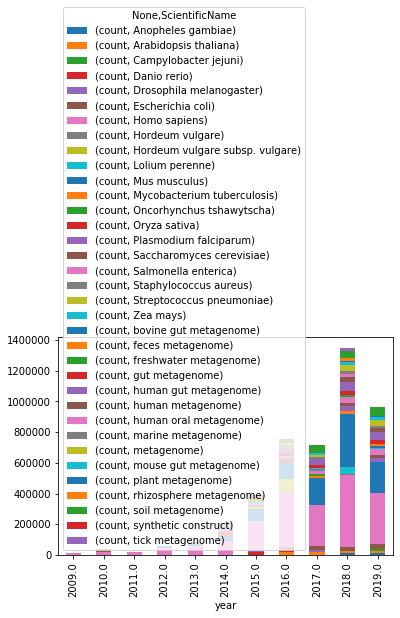

In [8]:
df_sra_species.pivot("year","ScientificName").plot(kind="bar",stacked=True)